In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats-redux-kernels-edition/sample_submission.csv
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train.zip
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test.zip


In [2]:
# -q : quiet(데이터 다 보여주지 않게 하기 위해)
# -o : 압축을 풀었는데, 또 푸는 오류 방지.
!unzip -q -o /kaggle/input/dogs-vs-cats-redux-kernels-edition/train.zip
!unzip -q -o /kaggle/input/dogs-vs-cats-redux-kernels-edition/test.zip

In [3]:
import glob
# 압축을 풀면 output folder에 존재.
glob.glob('train/*')[:5]

['train/dog.8167.jpg',
 'train/cat.8162.jpg',
 'train/dog.4957.jpg',
 'train/dog.6888.jpg',
 'train/dog.493.jpg']

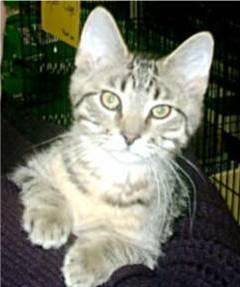

In [4]:
# 그림 그려보기.
from PIL import Image
Image.open('train/cat.7608.jpg')

In [5]:
# 전처리.
# 1. dataframe 만들기.(이미지, target)
# 2. 케라스 image data generator.

In [6]:
train = pd.DataFrame({'path':glob.glob('train/*')})
train

,path
0,train/dog.8167.jpg
1,train/cat.8162.jpg
2,train/dog.4957.jpg
3,train/dog.6888.jpg
4,train/dog.493.jpg
...,...
24995,train/cat.584.jpg
24996,train/dog.8605.jpg
24997,train/dog.6291.jpg
24998,train/dog.7705.jpg


In [7]:
train['label'] = train['path'].apply(lambda x : x.split('/')[1].split('.')[0])
train

,path,label
0,train/dog.8167.jpg,dog
1,train/cat.8162.jpg,cat
2,train/dog.4957.jpg,dog
3,train/dog.6888.jpg,dog
4,train/dog.493.jpg,dog
...,...,...
24995,train/cat.584.jpg,cat
24996,train/dog.8605.jpg,dog
24997,train/dog.6291.jpg,dog
24998,train/dog.7705.jpg,dog


In [8]:
# 이미지 데이터 generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
idg = ImageDataGenerator()

# 모델 학습
# 옵션 : train, 경로, y값 경로, target_size : 그림마다 사이즈 통일하기(점수 개선에 많이 사용하는 옵션)
# 2만 5천 장의 사진을 한꺼번에 학습하기 어렵다. -> batch_size : data 몇개씩 처리할지 생각. # 100개씩 250번.
train_generator = idg.flow_from_dataframe(train,x_col = 'path',y_col = 'label',target_size=(100,100),batch_size=100)

2021-09-16 14:52:25.246620: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-16 14:52:25.246750: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Found 25000 validated image filenames belonging to 2 classes.


In [9]:
# 모델링.
from tensorflow.keras import *
from tensorflow.keras.layers import *

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
# 1개의 데이터 정보를 넣어주기.
# image 정보 추출할 때 cnn 모델.
# node 개수 설정 : 32, 32개의 특징을 추출.(행렬 곱이 필요)
# input_shape : (100,100),3차원 이미지 채널.

2021-09-16 14:52:31.395173: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-16 14:52:31.398207: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-16 14:52:31.398249: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-16 14:52:31.398276: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (b7b22ad30791): /proc/driver/nvidia/version does not exist
2021-09-16 14:52:31.399848: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation